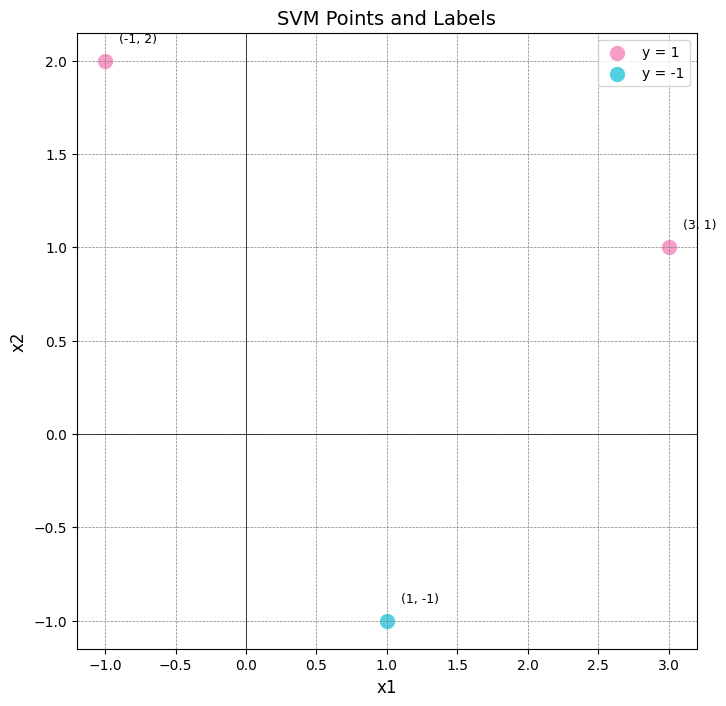

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Points and their labels
points = np.array([[-1, 2], [1, -1], [3, 1]])
labels = np.array([1, -1, 1])  # Corresponding labels

# Plotting the points
plt.figure(figsize=(8, 8))
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Scatter plot for +1 and -1 labeled points
for point, label in zip(points, labels):
    color = '#f79cc7' if label == 1 else '#51d1e1'
    plt.scatter(point[0], point[1], color=color, s=100, 
                label=f"y = {label}" if f"y = {label}" not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(point[0] + 0.1, point[1] + 0.1, f"({point[0]}, {point[1]})", fontsize=9)

# Labels and title
plt.title("SVM Points and Labels", fontsize=14)
plt.xlabel("x1", fontsize=12)
plt.ylabel("x2", fontsize=12)
plt.legend()
plt.savefig("svm_points_labels.png")
plt.show()


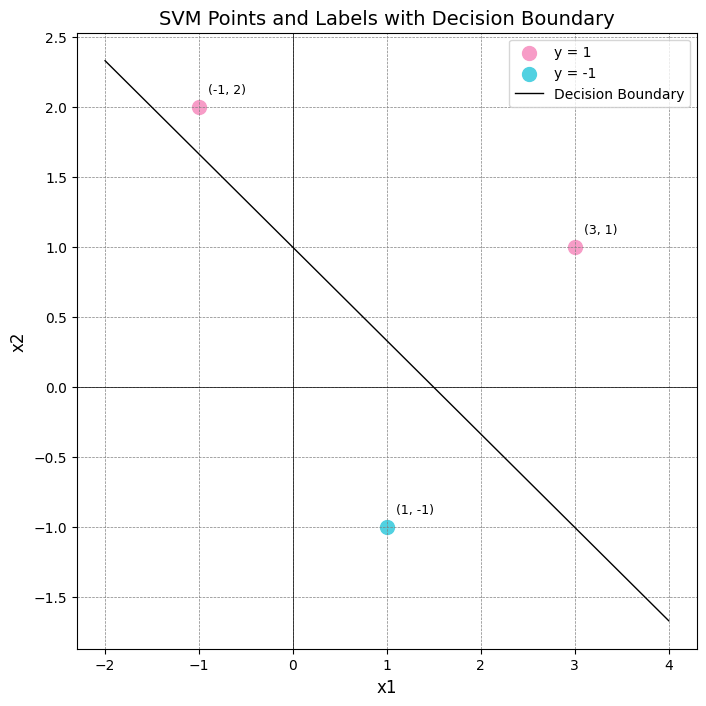

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Points and their labels
points = np.array([[-1, 2], [1, -1], [3, 1]])
labels = np.array([1, -1, 1])  # Corresponding labels

# Plotting the points
plt.figure(figsize=(8, 8))
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Scatter plot for +1 and -1 labeled points
for point, label in zip(points, labels):
    color = '#f79cc7' if label == 1 else '#51d1e1'
    plt.scatter(point[0], point[1], color=color, s=100, 
                label=f"y = {label}" if f"y = {label}" not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(point[0] + 0.1, point[1] + 0.1, f"({point[0]}, {point[1]})", fontsize=9)

# Decision boundary
w = np.array([2, 3])
b = -3
x_values = np.linspace(-2, 4, 100)
y_values = -(w[0] * x_values + b) / w[1]
plt.plot(x_values, y_values, color='black', linestyle='-', linewidth=1, label='Decision Boundary')

# Labels and title
plt.title("SVM Points and Labels with Decision Boundary", fontsize=14)
plt.xlabel("x1", fontsize=12)
plt.ylabel("x2", fontsize=12)
plt.legend()
plt.savefig("svm_points_labels_boundary.png")
plt.show()




In [93]:
import numpy as np
import pandas as pd
import random

# Seed for reproducibility
np.random.seed(42)

# List of 10-15 possible products
product_list = [
    "Laptop", "Phone", "Headphones", "Tablet", "Smartwatch", 
    "Shirt", "Jeans", "Jacket", "Blender", 
    "Sofa", "Table", "Chair", "Yoga Mat", "Fitness Tracker",
    "Pet Toys"
]

# Creating 25 data points for each column
data = {
    "Income": np.random.randint(25, 200, 25),  # In thousands
    "Age": np.random.randint(20, 65, 25),
    "Credit_Score": np.random.randint(550, 850, 25),
}

# Creating DataFrame from generated data
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
df.to_csv("customer_data.csv", index=False)

# Creating a function to generate a list of 4 random purchases for each user
def generate_last_4_purchases():
    # Randomly select 4 items from the product list
    return random.sample(product_list, 4)

# Adding a new column "Last_4_Purchases" where each row is a list of last 4 purchases
df["Last_4_Purchases"] = [generate_last_4_purchases() for _ in range(len(df))]

# Saving the DataFrame with Last_4_Purchases to a CSV file
df.to_csv("customer_data_with_last_purchases.csv", index=False)

# Creating target for credit eligibility based on Income and Credit Score
df["Credit_Eligibility"] = np.where((df["Income"] > 75) & (df["Credit_Score"] > 700), 1, 0)

# Displaying the final DataFrame (optional check)
df.head()


,Income,Age,Credit_Score,Last_4_Purchases,Credit_Eligibility
0,127,41,813,"[Phone, Yoga Mat, Shirt, Tablet]",1
1,117,63,584,"[Fitness Tracker, Yoga Mat, Headphones, Blender]",0
2,39,44,755,"[Pet Toys, Smartwatch, Tablet, Chair]",0
3,131,46,630,"[Tablet, Chair, Table, Headphones]",0
4,96,61,599,"[Fitness Tracker, Yoga Mat, Shirt, Jacket]",0


Logistic Regression Classification Report:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0


Confusion Matrix:
[[3 0]
 [0 5]]


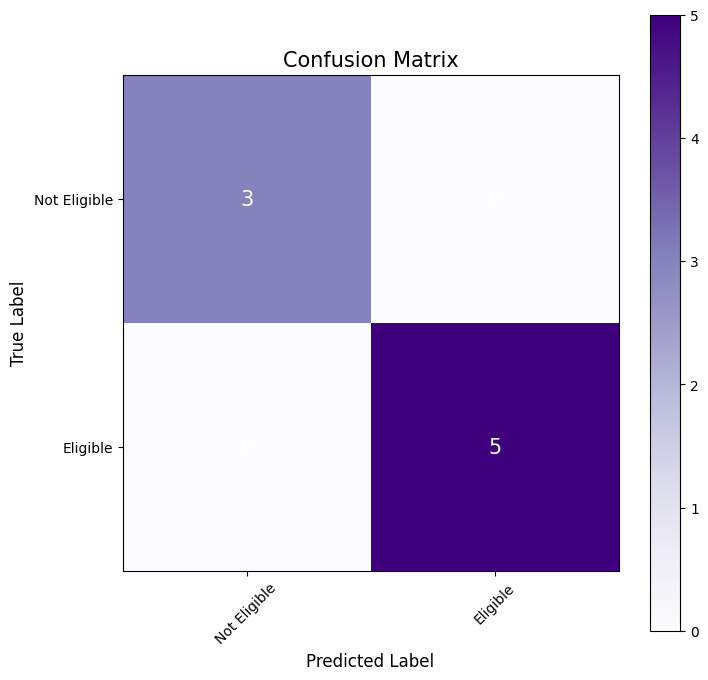

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Logistic Regression for Credit Eligibility
X = df[["Income", "Credit_Score"]]
y = df["Credit_Eligibility"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Generating classification report
logistic_report = classification_report(y_test, y_pred, output_dict=True)

# Displaying classification report
print("Logistic Regression Classification Report:")
print(f"Precision: {logistic_report['1']['precision']}")
print(f"Recall: {logistic_report['1']['recall']}")
print(f"F1 Score: {logistic_report['1']['f1-score']}")
print(f"Accuracy: {logistic_report['accuracy']}")
print("\n")

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib
import matplotlib.pyplot as plt

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Purples)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()

# Labels for the plot
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Not Eligible", "Eligible"], rotation=45, fontsize=10)
plt.yticks(tick_marks, ["Not Eligible", "Eligible"], fontsize=10)

# Text annotations for each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white', fontsize=15)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.savefig("confusion_matrix.png")
plt.show()


In [95]:
from mlxtend.frequent_patterns import apriori, association_rules

# Creating a binary matrix where each product is a column
one_hot_data = pd.DataFrame(0, index=df.index, columns=product_list)

# For each user, mark the products they have purchased
for i, purchases in enumerate(df["Last_4_Purchases"]):
    for purchase in purchases:
        one_hot_data.loc[i, purchase] = 1

# Displaying the one-hot encoded matrix (optional check)
print(one_hot_data.head())

# Applying Apriori to find frequent itemsets
frequent_itemsets = apriori(one_hot_data, min_support=0.1, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Displaying the association rules (optional check)
print(rules)

   Laptop  Phone  Headphones  Tablet  Smartwatch  Shirt  Jeans  Jacket  \
0       0      1           0       1           0      1      0       0   
1       0      0           1       0           0      0      0       0   
2       0      0           0       1           1      0      0       0   
3       0      0           1       1           0      0      0       0   
4       0      0           0       0           0      1      0       1   

   Blender  Sofa  Table  Chair  Yoga Mat  Fitness Tracker  Pet Toys  
0        0     0      0      0         1                0         0  
1        1     0      0      0         1                1         0  
2        0     0      0      1         0                0         1  
3        0     0      1      1         0                0         0  
4        0     0      0      0         1                1         0  
          antecedents        consequents  antecedent support  \
0              (Sofa)           (Laptop)                0.36   
1      

C:\Users\kenzi\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


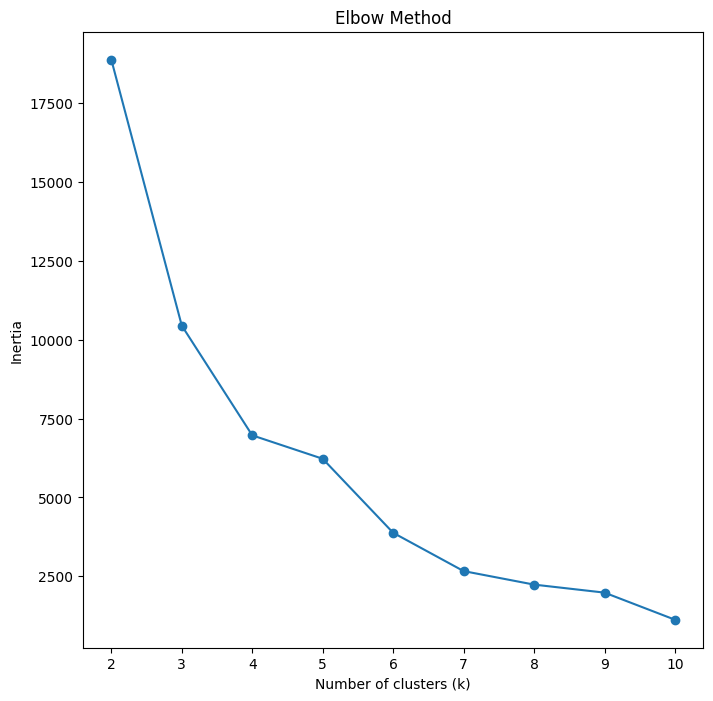

In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculating inertia for different values of k
inertia = []
silhouette_scores = []
k_range = range(2, 11)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[["Income", "Age"]])  # Use your relevant columns
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df[["Income", "Age"]], kmeans.labels_))

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 8))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.show()


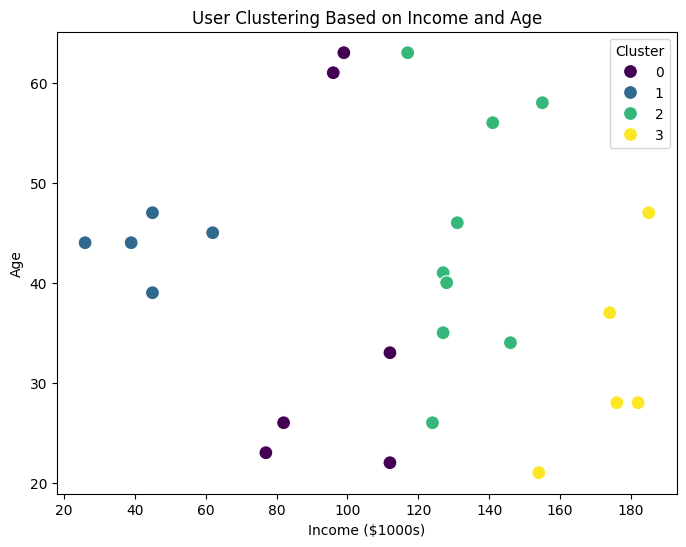

In [97]:
#K-Means Clustering for Product Recommendation
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Income", "Age"]])

# Visualizing K-Means Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Income", y="Age", hue="Cluster", palette="viridis", s=100)
plt.title("User Clustering Based on Income and Age")
plt.xlabel("Income ($1000s)")
plt.ylabel("Age")
plt.legend(title="Cluster")
plt.savefig("kmeans_clusters.png")
plt.show()
